# Entregável 1 - visão computacional

In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print ("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 3.2.0 


# Equalização de histograma

In [2]:
rintin = cv2.imread("RinTinTin.jpg")

In [3]:
rintin.shape

(240L, 320L, 3L)

In [4]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [5]:
rintin_gray.shape
rintin_gray

array([[21, 39, 42, ..., 41, 41, 37],
       [22, 40, 44, ..., 42, 42, 37],
       [23, 41, 45, ..., 42, 43, 38],
       ..., 
       [14, 28, 35, ..., 18, 18, 17],
       [16, 29, 36, ..., 18, 17, 17],
       [18, 31, 38, ..., 18, 17, 17]], dtype=uint8)

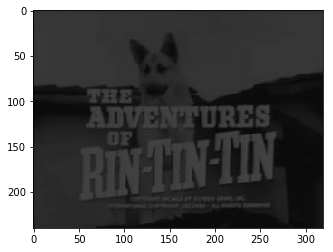

In [7]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

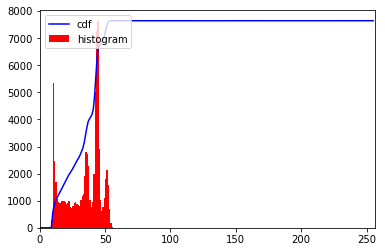

In [8]:
hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?
2. Equalize o histograma de maneira que a cumulativa seja uma função linear na diagonal do gráfico
3. Plote a imagem desenhada

1. Não, pois na imagem só há faixas de cores de cinza que variam de 0 à 56.

[[  66.3  158.1  173.4 ...,  168.3  168.3  147.9]
 [  71.4  163.2  183.6 ...,  173.4  173.4  147.9]
 [  76.5  168.3  188.7 ...,  173.4  178.5  153. ]
 ..., 
 [  30.6  102.   137.7 ...,   51.    51.    45.9]
 [  40.8  107.1  142.8 ...,   51.    45.9   45.9]
 [  51.   117.3  153.  ...,   51.    45.9   45.9]]


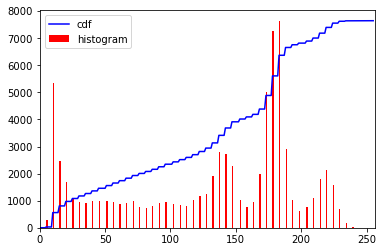

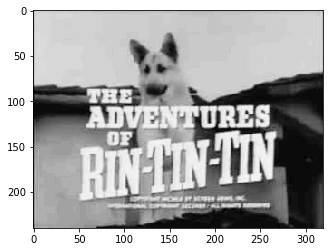

In [9]:
def transforma(pixel):
    x = (float(pixel) - 8)/50 * 255
    return x


matriz = []
lista = []
for i in range(0, len(rintin_gray)):
    linha = rintin_gray[i]
    for p in linha:
        lista.append(transforma(p))
    matriz.append(lista)
    lista = []

matriz = np.asarray(matriz)

print(matriz)
hist, bins = np.histogram(matriz.flatten(), 256, [0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(matriz.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

plt.imshow(matriz, vmin=0, vmax=255, cmap="Greys_r")

In [10]:
matriz.shape

(240L, 320L)

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](hall_box_battery1.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e a bateria azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui


1.

In [30]:
box = cv2.imread("hall_box_battery1.jpg")
box_rgb = cv2.cvtColor(box, cv2.COLOR_BGR2RGB)

box_r = box_rgb[:,:,0]
box_b = box_rgb[:,:,2]

array([[149, 122,  93],
       [150, 123,  94],
       [149, 124,  94],
       ..., 
       [113, 113, 115],
       [111, 111, 113],
       [106, 106, 108]], dtype=uint8)

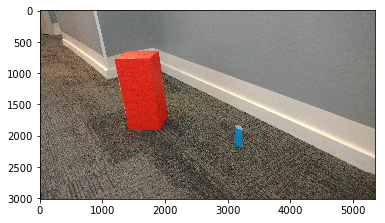

In [38]:
plt.imshow(box_rgb)
box_rgb[10]

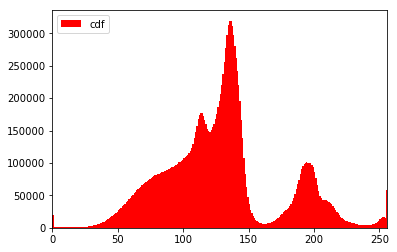

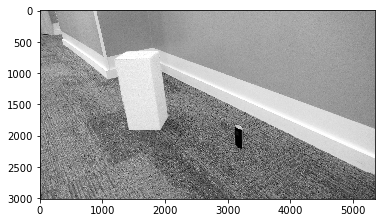

In [42]:
plt.hist(box_r.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

plt.imshow(box_r, cmap= "Greys_r")

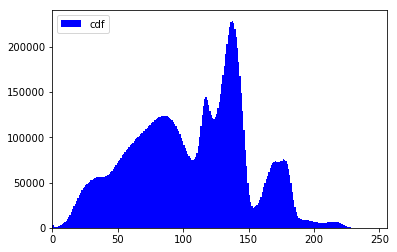

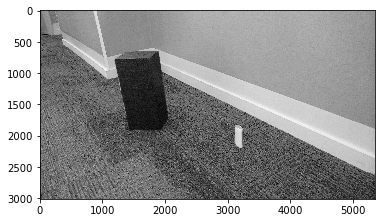

In [35]:
plt.hist(box_b.flatten(),256,[0,256], color = 'b')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

plt.imshow(box_b,  cmap= "Greys_r")

A partir da análise do histograma do canala R da imagem foi possível notar que há uma grande de quantidade de pixels com alta intensidade de coloração vermelha (na faixa de 170 a 220 do canal R). Nesse caso, é possível afirmar que há algo na imagem da coloração vermelha.
Analisando o histograma do canal B também é possível identificar que há na imagem um objeto que possua alta concentração de pixels da coloração azul, mais precisamente na faixa de 160 a 180 no canal B.

2.

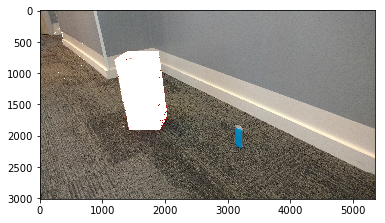

In [107]:
def branco(pixel):
    if pixel[0] > 164 and pixel[1] < 150 and pixel[2] < 150:
        return [255, 255, 255]
    else:
        return [pixel[0], pixel[1], pixel[2]]

matriz = []
lista = []
for i in range(len(box_rgb)):
    linha = box_rgb[i]
    for p in linha:
        lista.append(branco(p))
    matriz.append(lista)
    lista = []

matriz = np.asarray(matriz)
matriz = matriz.astype(np.uint8)
plt.imshow(matriz)